# Set up paths

In [1]:
# Specify the lib path
lib_path<-paste(getwd(),'/hana_reanalysis_lib_r42',sep='')
print(lib_path)

# Set the path
.libPaths(lib_path)
.libPaths()

#Set the vis device
setHook(packageEvent("grDevices", "onLoad"),
function(...) grDevices::X11.options(type='cairo'))
options(device='x11')

[1] "/v-data2/matt_davenport/HaNa_RE/HaNa_Reanalysis/hana_reanalysis_lib_r42"


[1] "/v-data2/matt_davenport/HaNa_RE/HaNa_Reanalysis/hana_reanalysis_lib_r42"
[2] "/home/mdavenport/bin/R4.2.1/R-4.2.1/library"

# 5 - Module GO and Convergent Signature Enrichment 

## Generate orthologs for human and finch

In [2]:
library(biomaRt)
library(tidyverse)

getOrthos <- function(input_org,output_org,one2one) {
  tmp_input <- paste(input_org,"_gene_ensembl",sep = "")
  tmp_mart <- useMart("ensembl", dataset = tmp_input,host = "www.ensembl.org")
  tmp_attr <- listAttributes(tmp_mart)
  tmp_genes <- getBM(attributes = c("ensembl_gene_id", "gene_biotype"), mart = tmp_mart)
  tmp_genes <- tmp_genes[grep("protein_coding",tmp_genes$gene_biotype),]
  attr_names <- tmp_attr[grep(output_org,tmp_attr$name),"name"]
  tmp_orthos <- getBM(attributes = c("ensembl_gene_id","external_gene_name",attr_names), filters = "ensembl_gene_id",values = tmp_genes$ensembl_gene_id, mart = tmp_mart)  
  
  if(one2one == TRUE){
  tmp_orthos <- tmp_orthos[grep("ortholog_one2one",tmp_orthos[,paste(output_org,"_homolog_orthology_type",sep = "")]),]
  }

  if(one2one == FALSE){
    tmp_orthos <- tmp_orthos
  }
  
  tmp_orthos

}
convert_table <- getOrthos("tguttata","hsapiens",TRUE) %>% as_tibble %>% 
    dplyr::select(external_gene_name, hsapiens_homolog_associated_gene_name, hsapiens_homolog_ensembl_gene ) %>%
    mutate(gene_id = external_gene_name) %>% mutate(external_gene_name = NULL) %>%
    mutate(hsap_gene_id = hsapiens_homolog_associated_gene_name) %>% mutate(hsapiens_homolog_associated_gene_name = NULL) %>%
    mutate(hsap_ensembl_id = hsapiens_homolog_ensembl_gene) %>% mutate(hsapiens_homolog_ensembl_gene = NULL) 

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks biomaRt::select()
Warning message:
“Ensembl will soon enforce the use of https.
Ensure the 'host' argument includes "https://"”
Ensembl site unresponsive, trying asia mirror



In [7]:
library(AnnotationDbi)
library(gage)
library(gageData)

bm <- useMart("ensembl")                                        
bm <- useDataset("hsapiens_gene_ensembl", mart=bm)
EG2GO <- getBM(mart=bm, attributes=c('ensembl_gene_id','go_id'))
EG2GO <- EG2GO %>% mutate(gene_id = ensembl_gene_id) %>% mutate(ensembl_gene_id = NULL)
head(EG2GO)

Ensembl site unresponsive, trying useast mirror



,go_id,gene_id
,<chr>,<chr>
1,GO:0030533,ENSG00000210049
2,GO:0006412,ENSG00000210049
3,GO:0003735,ENSG00000211459
4,GO:0005840,ENSG00000211459
5,,ENSG00000210077
6,GO:0003735,ENSG00000210082


In [8]:
mod_mem <- readRDS('/v-data2/matt_davenport/HaNa_RE/HaNa_Reanalysis/4_mod_membership_all_genes_broken_out.rds')
head(mod_mem)

A,B,C,D,E,F,G,H,I,J,K,L,gene_id,me_assigned
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
-0.03370932,0.18224771,-0.09239870,-0.15846667,0.17859488,0.001863475,0.12842694,-0.07431761,-0.07838895,-0.04283075,-0.11005667,-0.25708316,A1CF,X
0.02510845,-0.36403524,0.30267066,-0.08856526,0.44178052,0.037101574,-0.05202142,0.13264074,0.33842222,-0.05095856,-0.15834949,0.30518858,A2M,X
0.18255477,0.10507450,-0.10350080,-0.06411247,-0.08134665,-0.112865812,0.10047994,-0.04726497,-0.11964807,0.50213499,0.05178730,0.09712287,A4GNT,J
-0.17604402,-0.36389087,0.33743185,0.76031742,0.05085780,-0.326007923,-0.07671473,-0.15493875,-0.06018514,0.15980198,0.14182718,-0.10599198,AAAS,D
-0.72859604,0.26244931,0.29321445,0.02052947,0.04168985,0.032170986,0.27472125,-0.06501581,-0.13804126,-0.04817724,0.07641915,-0.04250240,AACS,A
-0.07273316,0.09715425,0.02042227,0.07404382,-0.05979183,-0.064351647,0.10828197,-0.02043833,-0.14172340,-0.13060679,-0.07616428,-0.02772431,AADAC,X


In [9]:
assigned_genes <- mod_mem %>% dplyr::filter(me_assigned != 'X') %>% dplyr::select('gene_id','me_assigned')
head(assigned_genes)

gene_id,me_assigned
<chr>,<fct>
A4GNT,J
AAAS,D
AACS,A
AADAT,A
AAGAB,C
AAK1,A


In [10]:
assigned_genes2 <- assigned_genes %>% left_join(convert_table, by='gene_id') %>% filter(hsap_ensembl_id != 'NA')
head(assigned_genes2)
dim(assigned_genes2)

gene_id,me_assigned,hsap_gene_id,hsap_ensembl_id
<chr>,<fct>,<chr>,<chr>
A4GNT,J,A4GNT,ENSG00000118017
AACS,A,AACS,ENSG00000081760
AADAT,A,AADAT,ENSG00000109576
AAGAB,C,AAGAB,ENSG00000103591
AAK1,A,AAK1,ENSG00000115977
AAMDC,B,AAMDC,ENSG00000087884


[1] 8079    4

## Ok now to get to the super informative GO stuff

In [11]:
EG2GO_univ <- EG2GO %>% dplyr::filter(gene_id %in% assigned_genes2$hsap_ensembl_id)
go_terms <- unique(EG2GO_univ$go_id)
go_terms<- go_terms[2:length(go_terms)] #no ontology isn't an ontology
names(go_terms) <- go_terms

In [12]:
go_terms[1:4]

GO:0016020   GO:0046872   GO:0030246   GO:0005581 
"GO:0016020" "GO:0046872" "GO:0030246" "GO:0005581"

In [13]:
go_terms <- go_terms %>% lapply(function(go_term){
    tmp <- EG2GO_univ %>% filter(go_id==go_term) 
    tmp$gene_id %>% unique 
})

head(go_terms,1)

$`GO:0016020`
   [1] "ENSG00000158270" "ENSG00000168461" "ENSG00000099917" "ENSG00000176105"
   [5] "ENSG00000197705" "ENSG00000184792" "ENSG00000178127" "ENSG00000154889"
   [9] "ENSG00000185666" "ENSG00000171873" "ENSG00000185721" "ENSG00000125827"
  [13] "ENSG00000100365" "ENSG00000125851" "ENSG00000101463" "ENSG00000088930"
  [17] "ENSG00000100346" "ENSG00000101474" "ENSG00000125864" "ENSG00000129515"
  [21] "ENSG00000152214" "ENSG00000253958" "ENSG00000154646" "ENSG00000173273"
  [25] "ENSG00000172296" "ENSG00000100519" "ENSG00000175806" "ENSG00000275591"
  [29] "ENSG00000180998" "ENSG00000126773" "ENSG00000168546" "ENSG00000164741"
  [33] "ENSG00000067900" "ENSG00000176641" "ENSG00000175387" "ENSG00000185053"
  [37] "ENSG00000198791" "ENSG00000075218" "ENSG00000078295" "ENSG00000184708"
  [41] "ENSG00000132792" "ENSG00000100612" "ENSG00000183654" "ENSG00000100731"
  [45] "ENSG00000155975" "ENSG00000112902" "ENSG00000145555" "ENSG00000175445"
  [49] "ENSG00000154654" "ENSG00000101445" "ENSG00000100347" "ENSG00000100372"
  [53] "ENSG00000140015" "ENSG00000172728" "ENSG00000166562" "ENSG00000062598"
  [57] "ENSG00000100150" "ENSG00000092964" "ENSG00000166603" "ENSG00000166479"
  [61] "ENSG00000147459" "ENSG00000158445" "ENSG00000124249" "ENSG00000149654"
  [65] "ENSG00000101542" "ENSG00000175354" "ENSG00000080189" "ENSG00000120907"
  [69] "ENSG00000147416" "ENSG00000182162" "ENSG00000165548" "ENSG00000151812"
  [73] "ENSG00000081913" "ENSG00000061337" "ENSG00000071991" "ENSG00000146950"
  [77] "ENSG00000011201" "ENSG00000104219" "ENSG00000168300" "ENSG00000033170"
  [81] "ENSG00000104765" "ENSG00000110328" "ENSG00000141424" "ENSG00000177054"
  [85] "ENSG00000124126" "ENSG00000177058" "ENSG00000101955" "ENSG00000126010"
  [89] "ENSG00000134343" "ENSG00000147027" "ENSG00000182732" "ENSG00000182621"
  [93] "ENSG00000040731" "ENSG00000149970" "ENSG00000165629" "ENSG00000197971"
  [97] "ENSG00000170743" "ENSG00000154122" "ENSG00000065665" "ENSG00000197217"
 [101] "ENSG00000157542" "ENSG00000154645" "ENSG00000113389" "ENSG00000121691"
 [105] "ENSG00000134490" "ENSG00000093000" "ENSG00000112964" "ENSG00000171044"
 [109] "ENSG00000183379" "ENSG00000113100" "ENSG00000089101" "ENSG00000147041"
 [113] "ENSG00000173698" "ENSG00000206579" "ENSG00000151320" "ENSG00000182858"
 [117] "ENSG00000197586" "ENSG00000139874" "ENSG00000100321" "ENSG00000133818"
 [121] "ENSG00000100095" "ENSG00000197563" "ENSG00000139971" "ENSG00000133872"
 [125] "ENSG00000150867" "ENSG00000115705" "ENSG00000204740" "ENSG00000148488"
 [129] "ENSG00000154162" "ENSG00000136750" "ENSG00000100311" "ENSG00000152932"
 [133] "ENSG00000138964" "ENSG00000170571" "ENSG00000164181" "ENSG00000164751"
 [137] "ENSG00000124164" "ENSG00000213949" "ENSG00000100764" "ENSG00000077943"
 [141] "ENSG00000177182" "ENSG00000012174" "ENSG00000066739" "ENSG00000160216"
 [145] "ENSG00000104442" "ENSG00000100300" "ENSG00000049860" "ENSG00000064666"
 [149] "ENSG00000158470" "ENSG00000180182" "ENSG00000205213" "ENSG00000076641"
 [153] "ENSG00000147119" "ENSG00000171863" "ENSG00000164880" "ENSG00000066455"
 [157] "ENSG00000099864" "ENSG00000174695" "ENSG00000070269" "ENSG00000166342"
 [161] "ENSG00000179242" "ENSG00000165186" "ENSG00000169895" "ENSG00000038427"
 [165] "ENSG00000125912" "ENSG00000164654" "ENSG00000122912" "ENSG00000151693"
 [169] "ENSG00000174227" "ENSG00000177706" "ENSG00000105289" "ENSG00000185238"
 [173] "ENSG00000104331" "ENSG00000100739" "ENSG00000101361" "ENSG00000164828"
 [177] "ENSG00000040341" "ENSG00000278195" "ENSG00000187045" "ENSG00000109667"
 [181] "ENSG00000154065" "ENSG00000065923" "ENSG00000277893" "ENSG00000003147"
 [185] "ENSG00000152270" "ENSG00000131080" "ENSG00000165914" "ENSG00000099250"
 [189] "ENSG00000173198" "ENSG00000169676" "ENSG00000182220" "ENSG00000176533"
 [193] "ENSG00000106537" "ENSG00000152315" "ENSG00000164949" "ENSG00000196208"
 [197] "ENSG00000148948" "ENSG00000106392" "ENSG00000152990" "ENSG00000156103"
 [201] "ENSG00000157954" "ENSG000000

In [14]:
mods <- unique(assigned_genes2$me_assigned %>% as.character)
names(mods) <- mods

gage_res_discrete <- mods %>% lapply(function(mod){

    gage_tbl <- assigned_genes2 %>% mutate(inModule = as.numeric(me_assigned==mod))  %>% 
                    dplyr::select(hsap_ensembl_id,inModule)

    gage_exprs <- gage_tbl$inModule %>% as.matrix
    rownames(gage_exprs) <- gage_tbl$hsap_ensembl_id
    return (gage(gage_exprs, gsets = go_terms, ref = NULL, samp = NULL)$greater %>%
                as.data.frame %>% as_tibble(rownames='GO_id'))
})

## Lil wrangle

In [15]:
gage_res_discrete2 <- mods %>% lapply(function(mod){
    gage_res_discrete[[mod]] %>% mutate(module=mod)
})

In [16]:
gage_p_arranged <- gage_res_discrete2 %>% lapply(arrange,p.val)
gage_p_arranged2 <- gage_p_arranged %>% lapply(function(tbl){
    tbl %>% mutate(GO_id=factor(as.factor(GO_id),levels=unique(tbl$GO_id)%>%rev))
})

### How's it look?

In [17]:
gage_sig <- gage_p_arranged2 %>% lapply(function(tbl){tbl %>% filter(p.val <=0.05)})
gage_sig$E

GO_id,p.geomean,stat.mean,p.val,q.val,set.size,exp1,module
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
GO:0006457,0.02496394,1.977605,0.02496394,0.9411858,84,0.02496394,E
GO:0006281,0.03554250,1.809566,0.03554250,0.9411858,225,0.03554250,E
GO:0005730,0.04431276,1.704523,0.04431276,0.9411858,472,0.04431276,E


## Need to get go terms, not just IDs. What a pain

In [18]:
library(GO.db)

# extract a named vector of all terms
goterms <- Term(GOTERM)
GOids <- names(goterms)

GO_terms_tbl <- tibble(GOterms=goterms,GOids=GOids)

gage_sig2 <- gage_sig %>% lapply(function(tbl){
    tbl %>% mutate(GOids = GO_id) %>% mutate(GO_id=NULL) %>% left_join(GO_terms_tbl,by='GOids')
})


In [233]:
gage_sig2$G

p.geomean,stat.mean,p.val,q.val,set.size,exp1,module,GOids,GOterms
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
0.009358513,2.378896,0.009358513,0.8684018,99,0.009358513,G,GO:0009897,external side of plasma membrane
0.016575743,2.135083,0.016575743,0.8684018,356,0.016575743,G,GO:0000981,"DNA-binding transcription factor activity, RNA polymerase II-specific"
0.017435970,2.116302,0.017435970,0.8684018,268,0.017435970,G,GO:0003700,DNA-binding transcription factor activity
0.018113533,2.113011,0.018113533,0.8684018,104,0.018113533,G,GO:0006954,inflammatory response
0.023702170,2.025100,0.023702170,0.8684018,45,0.023702170,G,GO:0005201,extracellular matrix structural constituent
0.028660831,1.903462,0.028660831,0.8684018,468,0.028660831,G,GO:0030154,cell differentiation
0.029093517,1.952258,0.029093517,0.8684018,31,0.029093517,G,GO:0002062,chondrocyte differentiation
0.033352067,1.951471,0.033352067,0.8684018,16,0.033352067,G,GO:0003180,aortic valve morphogenesis
0.034507563,1.842394,0.034507563,0.8684018,59,0.034507563,G,GO:0009653,anatomical structure morphogenesis


In [235]:
gage_sig2 %>% purrr::reduce(rbind) %>% dplyr::select(-one_of('q.val')) %>% write.csv('supplemental_sig_go_enrich.csv')

## Now I gotta do something similar for the RA and HVC convergent gene signatures to LMC. Probably want some kind of bubble plot.

In [20]:
ra_raw <- read.csv2(file='ra_lmc_sharedGenes.csv',header = TRUE,sep = ',')
hvc_raw <- read.csv2(file='hvc_lmc_sharedGenes.csv',header = TRUE,sep = ',')

In [73]:
greg_enrich_list <- list()
greg_enrich_list$RA <- ra_raw$gene %>% as.character
greg_enrich_list$HVC <- hvc_raw$gene %>% as.character

greg_enrich_list$RA %>% length
greg_enrich_list$HVC %>% length

[1] 45

[1] 66

In [22]:
gage_res_greg_convergent <- mods %>% lapply(function(mod){

    gage_tbl <- assigned_genes2 %>% mutate(inModule = as.numeric(me_assigned==mod))  %>% 
                    dplyr::select(hsap_ensembl_id,inModule)

    gage_exprs <- gage_tbl$inModule %>% as.matrix
    rownames(gage_exprs) <- gage_tbl$hsap_ensembl_id
    return (gage(gage_exprs, gsets = greg_enrich_list, ref = NULL, samp = NULL)$greater %>%
                as.data.frame %>% as_tibble(rownames='GO_id')#%>% filter(p.val<1)
           )
})

gage_res_greg_convergent2<- mods %>% lapply(function(mod){
    gage_res_greg_convergent[[mod]] %>% mutate(module=mod)
}) %>% purrr::reduce(rbind)



In [23]:
head(gage_res_greg_convergent2 )

GO_id,p.geomean,stat.mean,p.val,q.val,set.size,exp1,module
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
RA,0.64598877,-0.3774947,0.64598877,0.6793917,37,0.64598877,J
HVC,0.67939167,-0.4685408,0.67939167,0.6793917,57,0.67939167,J
RA,0.84705932,-1.0312802,0.84705932,0.9422802,37,0.84705932,A
HVC,0.94228020,-1.5866813,0.94228020,0.9422802,57,0.94228020,A
RA,0.07802031,1.4348520,0.07802031,0.1560406,37,0.07802031,C
HVC,0.25824353,0.6508730,0.25824353,0.2582435,57,0.25824353,C


### Erich wants to see the actual enrichment value for this

In [45]:
convergent_fold_enrichment <- mods %>% lapply(function(mod){
    n_hvc_convergent <- length(greg_enrich_list$HVC)
    n_ra_convergent  <- length(greg_enrich_list$RA)
    
    total_genes <- assigned_genes2$gene_id %>% length
    
    tmp_tbl <- assigned_genes2 %>% filter(me_assigned == mod)
    mod_total <- tmp_tbl$gene_id %>% length
    
    ra_tbl <- tmp_tbl %>% filter(hsap_ensembl_id %in% greg_enrich_list$RA)
    n_ra <- ra_tbl$gene_id %>% length
    hvc_tbl <- tmp_tbl %>% filter(hsap_ensembl_id %in% greg_enrich_list$HVC)
    n_hvc <- hvc_tbl$gene_id %>% length
    
    expected_fraction_ra  <- (n_ra_convergent / total_genes) * (mod_total / total_genes)
    expected_fraction_hvc <- (n_hvc_convergent / total_genes) * (mod_total / total_genes)

    observed_fraction_ra  <- n_ra / total_genes
    observed_fraction_hvc <- n_hvc / total_genes
    res <- tibble(GO_id = c('RA','HVC'),
                  module = c(mod,mod),
                  fold_expected = c(observed_fraction_ra/expected_fraction_ra,
                                    observed_fraction_hvc/expected_fraction_hvc),
                  mod_size=mod_total,
                  set_size = c(n_ra,n_hvc))
    return(res)
    
}) %>% purrr::reduce(rbind)

In [46]:
gage_res_greg_convergent3 <- gage_res_greg_convergent2 %>% 
    left_join(convergent_fold_enrichment, by=c('module','GO_id')) %>% mutate(is_sig=q.val<=0.1)

Warning message in sqrt(x):
“NaNs produced”
Warning message:
“Removed 10 rows containing missing values (geom_point).”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”


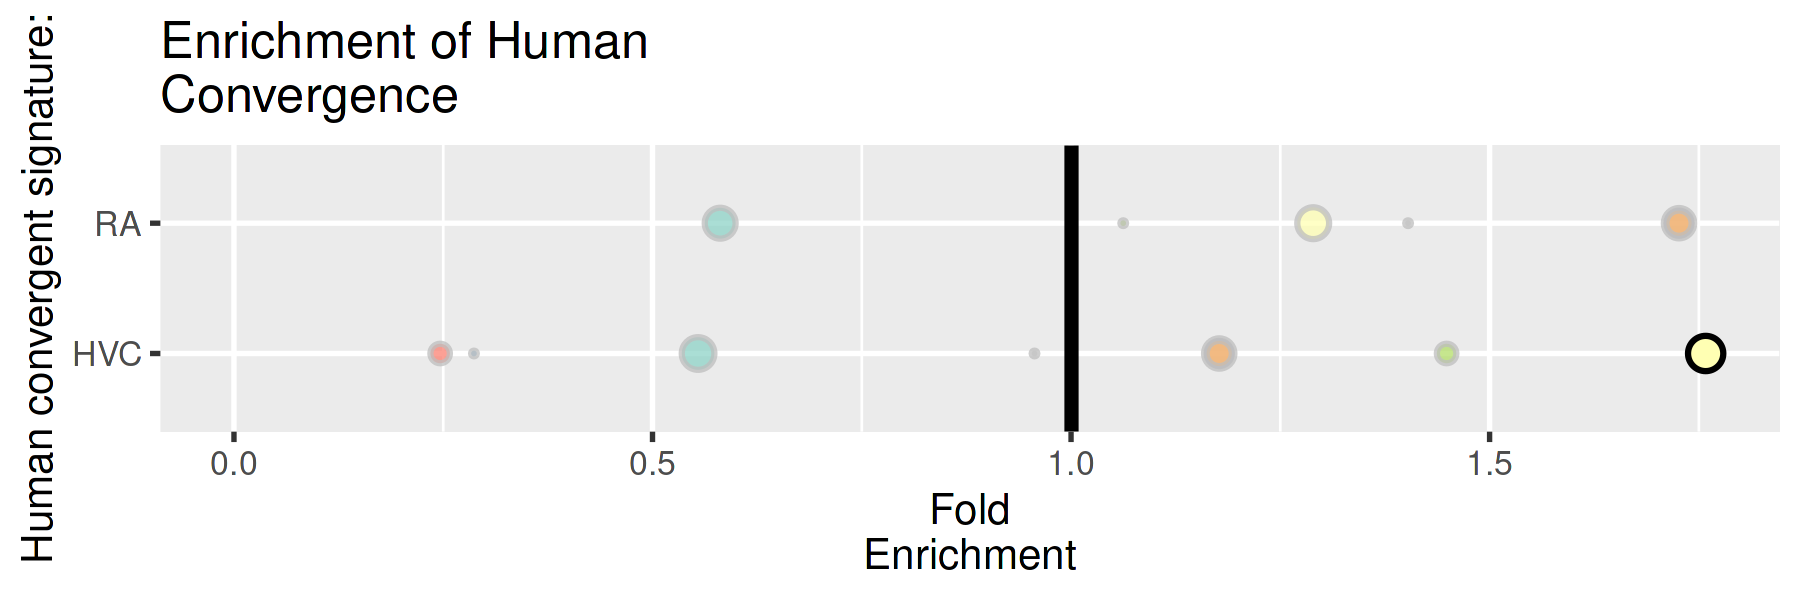

In [68]:
bubbles <- gage_res_greg_convergent3 %>% ggplot(aes(y=GO_id,x=fold_expected,
                                                    fill=module,color=is_sig,size=(log10(set_size)))) + 
            geom_vline(xintercept=1,color='black',size=3) + 
            geom_point(data=gage_res_greg_convergent3 %>% filter(is_sig==FALSE),
                       shape=21,stroke=2,alpha=.75,show.legend = FALSE) + 
            geom_point(data=gage_res_greg_convergent3 %>% filter(is_sig==TRUE),
                       shape=21,stroke=2) + 
            scale_size_continuous('# genes',range = c(0,10),
                                  breaks = c(0,1,2),limits=c(0,2),labels=c(1,10,100))+
            scale_fill_brewer('Module',palette='Set3')+
            scale_color_manual('p\n<= 0.05', values=c('grey','black'))+
            theme_grey(base_size=25) +
            scale_x_continuous('Fold\nEnrichment')+
            scale_y_discrete('Human convergent signature:')+
            guides(fill = guide_legend(override.aes = list(size=10)))+ggtitle('Enrichment of Human\nConvergence')

options(repr.plot.width=15, repr.plot.height=5)
bubbles+theme(legend.position='none')

In [26]:
#function to grab the legend
g_legend<-function(a.gplot){
  tmp <- ggplot_gtable(ggplot_build(a.gplot))
  leg <- which(sapply(tmp$grobs, function(x) x$name) == "guide-box")
  legend <- tmp$grobs[[leg]]
  return(legend)} 

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 6 rows containing missing values (geom_point).”


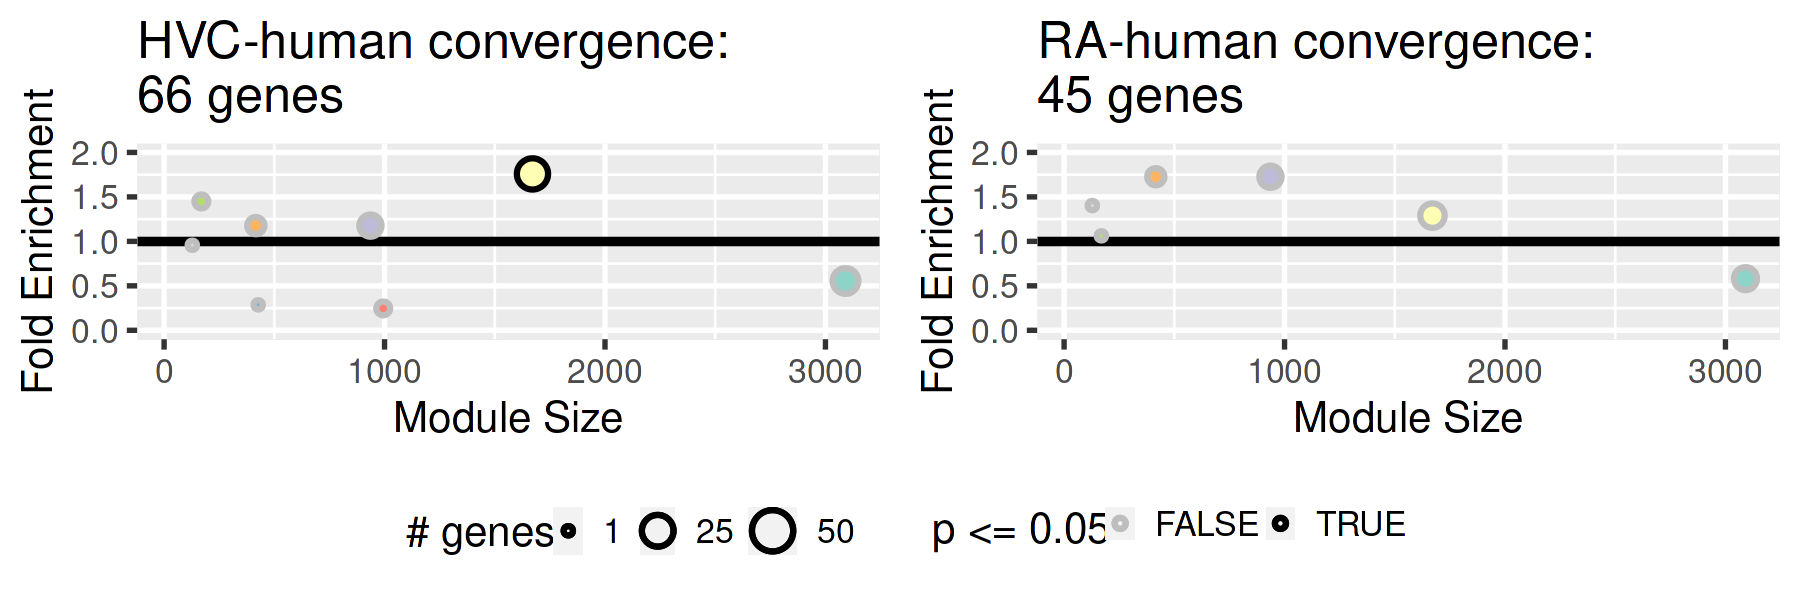

In [98]:
library(ggpubr)
options(repr.plot.width=10, repr.plot.height=10)

converge_plter <- function(reg){
    gage_res_greg_convergent3 %>% filter(GO_id==reg) %>%
    ggplot(aes(x=mod_size,
               y=fold_expected,
               fill=module,color=is_sig, 
               size = set_size))+
        geom_hline(yintercept=1,color='black',size=2) + 
        geom_point(data=gage_res_greg_convergent3%>% filter(GO_id==reg) %>% filter(is_sig==FALSE),shape=21,stroke=2) + 
        geom_point(data=gage_res_greg_convergent3%>% filter(GO_id==reg) %>% filter(is_sig==TRUE),shape=21,stroke=2) + 
        scale_fill_brewer('Module',palette='Set3')+
        scale_color_manual('p <= 0.05', values=c('grey','black'))+
        scale_size_continuous('# genes', range=c(1,10), breaks=c(1,25,50),limits=c(1,50))+
        theme_grey(base_size=25) +
        scale_y_continuous('Fold Enrichment',breaks=c(0,.5,1,1.5,2),limits=c(0,2))+
        scale_x_continuous('Module Size')+ 
        ggtitle(reg)+
        guides(fill = FALSE)+
        theme(legend.position='bottom')}

hvc_plt <- converge_plter('HVC') + ggtitle('HVC-human convergence:\n66 genes')
lgnd<- g_legend(hvc_plt)
ra_plt <- converge_plter('RA') +theme(legend.position='none') + ggtitle("RA-human convergence:\n45 genes")
hvc_plt <- hvc_plt+theme(legend.position='none')+ylab('')


options(repr.plot.width=15, repr.plot.height=5)

row1<-ggarrange(hvc_plt,ra_plt,nrow=1,widths = c(1,1))
grg_enrich<- ggarrange(row1,lgnd,nrow=2,heights = c(1,.3))
grg_enrich

ggsave(file='svg_files/fig3_gregEnrich_new.svg',plot=grg_enrich,width = 15,height = 4)

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



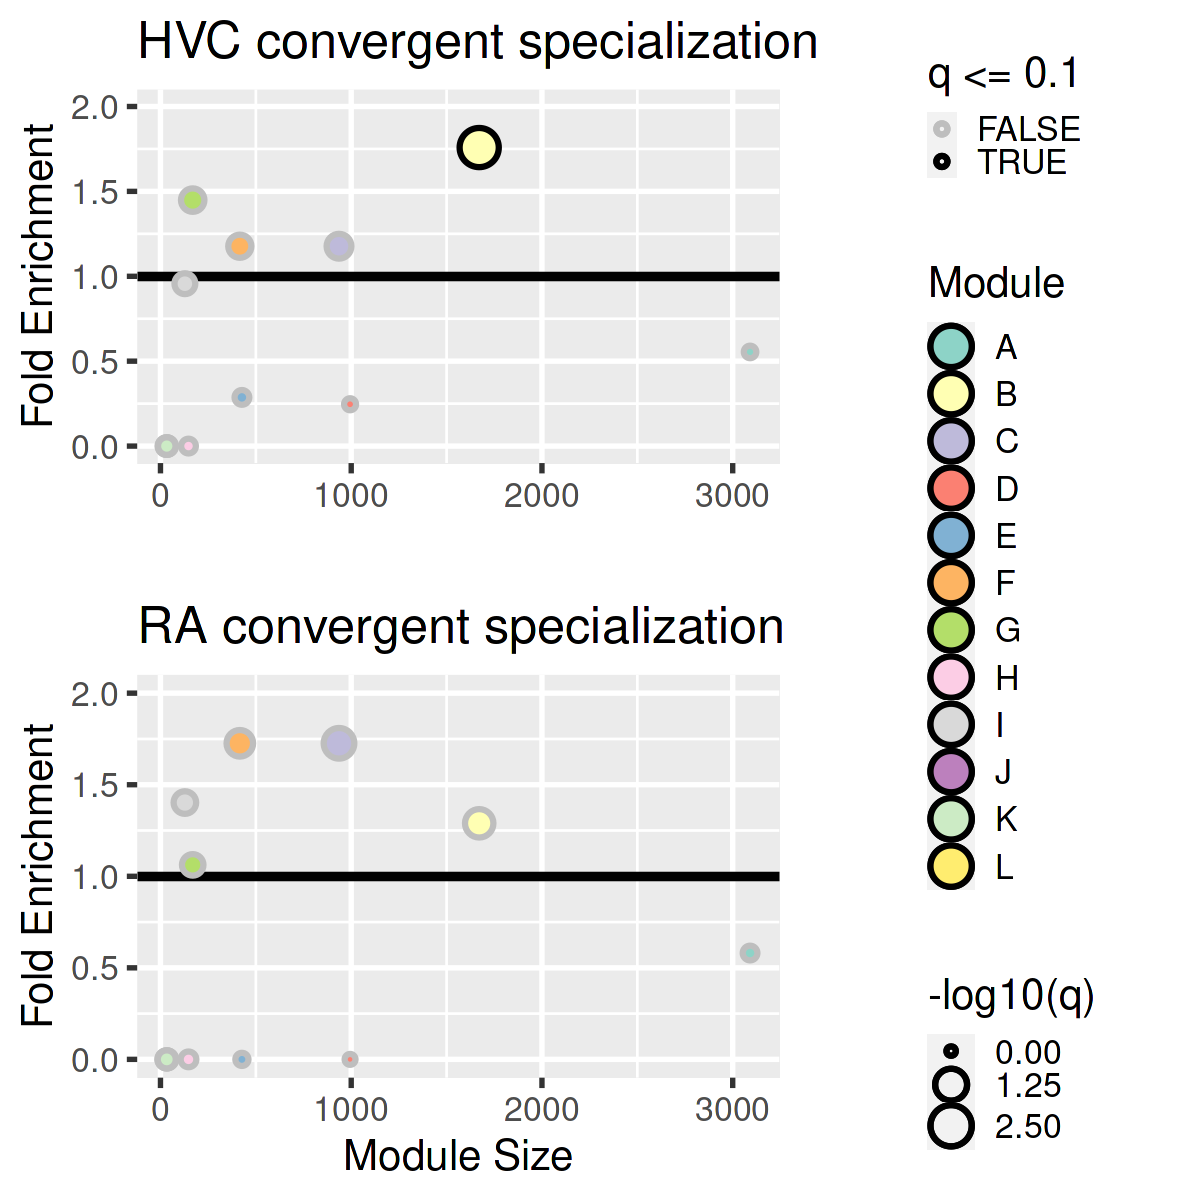

In [25]:
library(ggpubr)
options(repr.plot.width=10, repr.plot.height=10)

gage_res_greg_convergent3$is_sig2<-gage_res_greg_convergent3$q.val<=0.1

converge_plter <- function(reg){
    gage_res_greg_convergent3 %>% filter(GO_id==reg) %>%
    ggplot(aes(x=mod_size,
               y=fold_expected,
               fill=module,color=is_sig2, 
               size = -log10(q.val)))+
        geom_hline(yintercept=1,color='black',size=2) + 
        geom_point(data=gage_res_greg_convergent3%>% filter(GO_id==reg) %>% filter(is_sig==FALSE),shape=21,stroke=2) + 
        geom_point(data=gage_res_greg_convergent3%>% filter(GO_id==reg) %>% filter(is_sig==TRUE),shape=21,stroke=2) + 
        scale_fill_brewer('Module',palette='Set3')+
        scale_color_manual('q <= 0.1', values=c('grey','black'))+
        scale_size_continuous('-log10(q)', range=c(1,10), breaks=c(0,1.25,2.5),limits=c(0,2.5))+
        theme_grey(base_size=25) +
        scale_y_continuous('Fold Enrichment',breaks=c(0,.5,1,1.5,2),limits=c(0,2))+
        scale_x_continuous('')+ 
        ggtitle(reg)+
        guides(fill = guide_legend(override.aes = list(size=10)))}

hvc_plt <- converge_plter('HVC') + ggtitle('HVC convergent specialization')
lgnd<- g_legend(hvc_plt)
ra_plt <- converge_plter('RA') +theme(legend.position='none') +scale_x_continuous('Module Size') + ggtitle("RA convergent specialization")
hvc_plt <- hvc_plt+theme(legend.position='none')+xlab('')


col1_2 <- ggarrange(hvc_plt,ra_plt,nrow=2,heights = c(1,1.05))
grg_enrich_2 <- ggarrange(col1,lgnd,widths=c(1,.5))
grg_enrich_2
ggsave(file='svg_files/figs5_gregEnrich_fdr.svg',plot=grg_enrich_2,width = 10,height = 10)

### Who are these genes in B?

In [26]:
assigned_genes2 %>% filter(me_assigned == 'B') %>% filter(hsap_ensembl_id %in% greg_enrich_list$HVC)

gene_id,me_assigned,hsap_gene_id,hsap_ensembl_id
<chr>,<fct>,<chr>,<chr>
ANK1,B,ANK1,ENSG00000029534
CA10,B,CA10,ENSG00000154975
CAMK2A,B,CAMK2A,ENSG00000070808
CAMKV,B,CAMKV,ENSG00000164076
CDH4,B,CDH4,ENSG00000179242
DACH2,B,DACH2,ENSG00000126733
DOK4,B,DOK4,ENSG00000125170
GRM1,B,GRM1,ENSG00000152822
KIRREL3,B,KIRREL3,ENSG00000149571


In [27]:
sessionInfo()

R version 4.2.1 (2022-06-23)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 22.04.1 LTS

Matrix products: default
BLAS:   /home/mdavenport/bin/R4.2.1/R-4.2.1/lib/libRblas.so
LAPACK: /home/mdavenport/bin/R4.2.1/R-4.2.1/lib/libRlapack.so

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ggpubr_0.4.0         GO.db_3.15.0         gageData_2.34.0     
 [4] gage_2.46.1          AnnotationDbi_1.58.0 IRanges_2.30.1      
 [7] S4Vectors_0.34.0     Biobase_2.56.0       BiocGenerics_0.42.0 
[10] forcats_0.5.2        stringr_1.4.1        dplyr_1.0.10        
[13] purrr_0.3.5          readr_2.